In [2150]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


### Data Load

In [2151]:
X_train = np.load('data/X_train_regression1.npy')
X_train_df = pd.DataFrame(X_train)
y_train = np.load('data/y_train_regression1.npy')
y_train_df = pd.DataFrame(y_train)
X_test = np.load('data/X_test_regression1.npy')
X_test_df = pd.DataFrame(X_test)

### EDA

#### Data distribution analisys

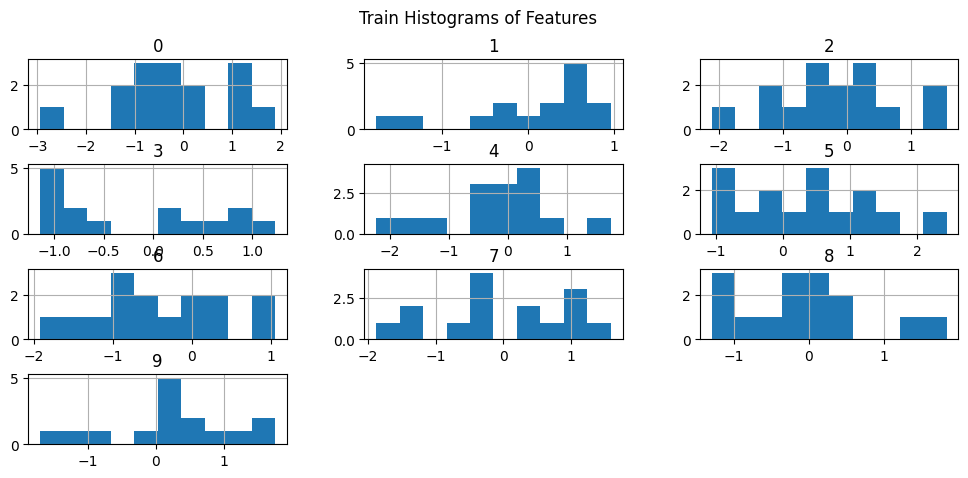

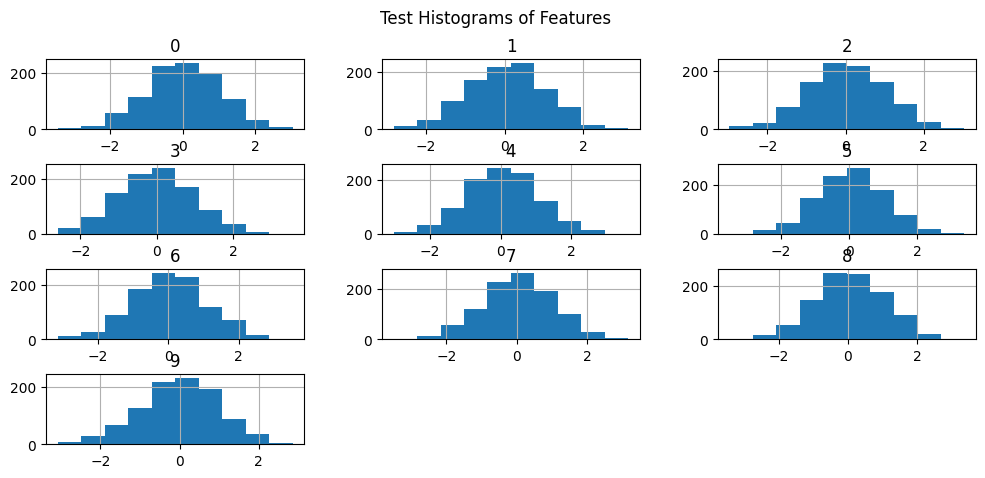

In [2152]:
X_train_df.hist(bins=10, figsize=(12, 5))
plt.suptitle('Train Histograms of Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

X_test_df.hist(bins=10, figsize=(12, 5))
plt.suptitle('Test Histograms of Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Outlier analysis

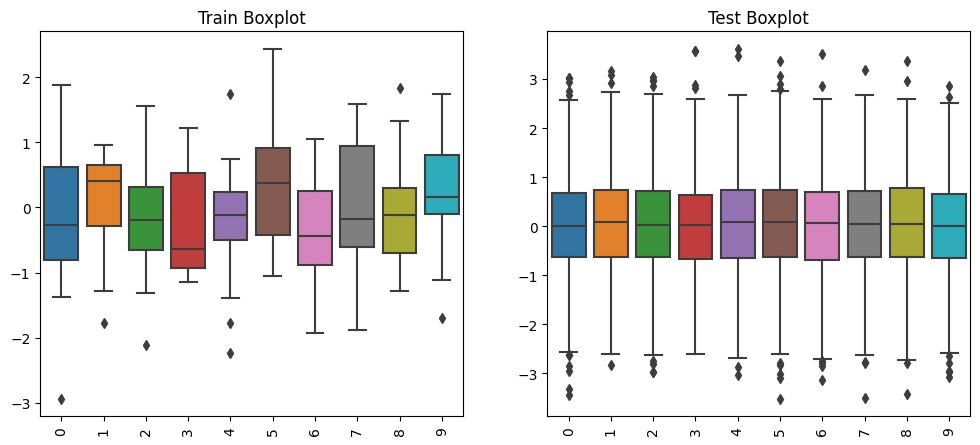

In [2153]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=X_train_df, orient="v", ax=axes[0])
axes[0].set_title('Train Boxplot')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.boxplot(data=X_test_df, orient="v", ax=axes[1])
axes[1].set_title('Test Boxplot')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2)
plt.show()

#### Data correlation analisys

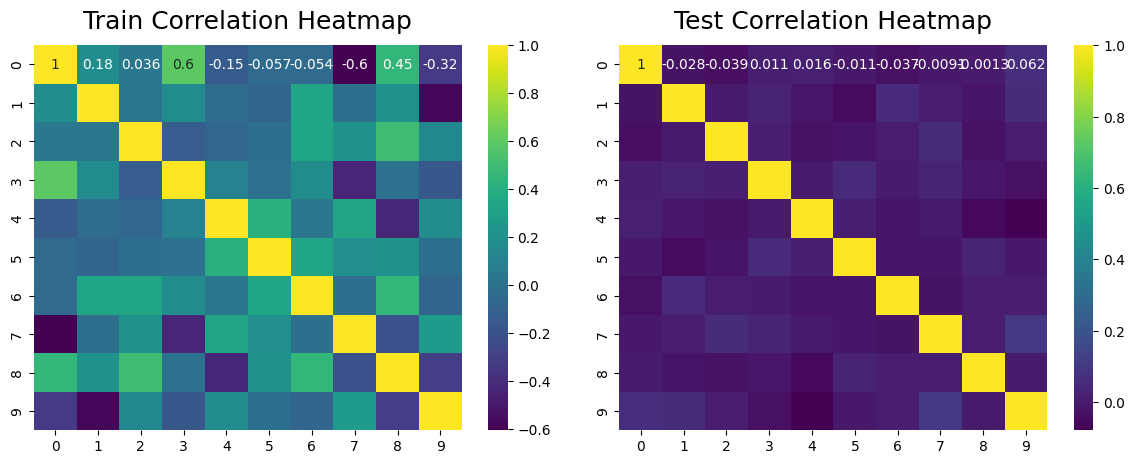

In [2154]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

X_train_corr = X_train_df.corr()
heatmap1 = sns.heatmap(X_train_corr, annot=True, cmap="viridis", ax=axes[0])
heatmap1.set_title('Train Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

X_test_corr = X_test_df.corr()
heatmap2 = sns.heatmap(X_test_corr, annot=True, cmap="viridis", ax=axes[1])
heatmap2.set_title('Test Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

plt.tight_layout(pad=2.0)
plt.show()

Feature-target correlation:

Feature 0: 0.386
Feature 1: 4.036
Feature 2: 2.898
Feature 3: 1.352
Feature 4: 1.121
Feature 5: 8.329
Feature 6: 0.001
Feature 7: 1.950
Feature 8: 0.480
Feature 9: 3.330


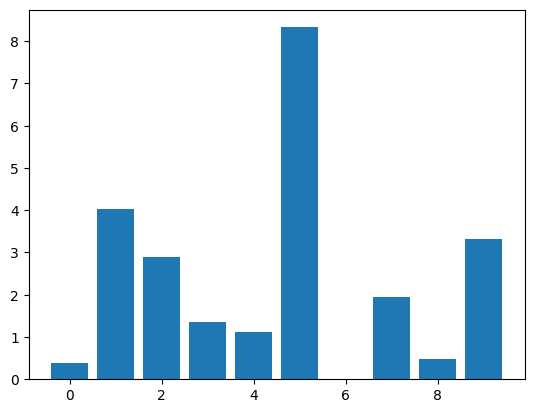

In [2155]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train_df, y_train_df)

print("Feature-target correlation:\n")
for i, score in enumerate(fs.scores_):
 print(f'Feature {i}: {score:.3f}')
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Preprocessing

#### Scaling

In [2156]:
# Important for PCA, preferrable for Ridge and Lasso
standard_scaler = StandardScaler()
X_train_df = pd.DataFrame(standard_scaler.fit_transform(X_train_df))
X_test_df = pd.DataFrame(standard_scaler.transform(X_test_df))

In [2157]:
# minmax_scaler = MinMaxScaler()
# X_train_df = pd.DataFrame(minmax_scaler.fit_transform(X_train_df))
# X_test_df = pd.DataFrame(minmax_scaler.transform(X_test_df))

#### Feature Selection

Test dropping different features

In [2158]:
features_to_drop =[0, 4, 8] 
X_train_df = X_train_df.drop(columns=features_to_drop)
X_test_df = X_test_df.drop(columns=features_to_drop)
X_train_df

,1,2,3,5,6,7,9
0,0.401346,-0.245046,0.316530,-1.483600,-1.943761,0.532589,-1.411915
1,0.718482,0.398100,-1.077764,0.853477,1.799821,-0.722633,-2.012156
2,-0.350437,0.964200,-1.047279,-1.139751,-0.027363,1.130381,1.550156
3,0.933501,-0.212303,0.498543,-0.236812,0.350473,-0.177622,-0.143197
4,0.403130,-1.212602,-0.690536,0.050926,-0.633802,1.100067,-0.567879
5,-1.831195,-2.020747,-0.760523,0.144737,-0.641151,-0.369524,1.565706
6,1.133717,0.448799,1.394556,2.239123,1.435590,0.321997,-0.107166
7,0.724385,-0.670975,-0.898893,0.895958,-0.076194,1.563679,0.455860
8,-0.674528,-0.379515,1.343691,0.348018,-0.929585,-1.434646,-0.078468
9,-2.462021,1.723234,-1.130872,1.287910,-0.594698,1.012251,1.194758


#### PCA
Test different number of components

In [2159]:
# pca_components = 6
# pca = PCA(n_components=pca_components)

# X_train_df = pd.DataFrame(pca.fit_transform(X_train_df))
# X_test_df = pd.DataFrame(pca.transform(X_test_df))

# explained_variance_ratio = pca.explained_variance_ratio_

# for i, ratio in enumerate(explained_variance_ratio):
#     print(f"Explained Variance Ratio (Component {i + 1}): {ratio:.4f}")

### Cross Validation

In [2160]:
k_folds = len(X_train_df) #LOOCV
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
param_grid = {'alpha': alphas}

#### Lasso

In [2161]:
lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=k_folds, scoring='neg_mean_squared_error')
grid_search.fit(X_train_df, y_train_df)

best_lasso_alpha = grid_search.best_params_['alpha']
best_lasso_score = -grid_search.best_score_
print(f" Best alpha: {best_lasso_alpha} -> Score: {best_lasso_score} MSE")

 Best alpha: 0.01 -> Score: 2.1572375370407686 MSE


#### Ridge

In [2162]:
ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=k_folds, scoring='neg_mean_squared_error')
grid_search.fit(X_train_df, y_train_df)

best_ridge_alpha = grid_search.best_params_['alpha']
best_ridge_score = -grid_search.best_score_
print(f" Best alpha: {best_ridge_alpha} -> Score: {best_ridge_score} MSE")

 Best alpha: 1.0 -> Score: 2.1778340272281955 MSE


#### Ordinary Least Squares

In [2163]:
linear_regression = LinearRegression()

mse_scores = -cross_val_score(linear_regression, X_train_df, y_train_df, cv=k_folds, scoring='neg_mean_squared_error')
lr_score = np.mean(mse_scores)
print(f"Score: {np.mean(lr_score)} MSE")

Score: 2.338738589237935 MSE


### Training

In [2164]:
model = Lasso(alpha=best_lasso_alpha)
model.fit(X_train_df, y_train)

# model = Ridge(alpha=best_ridge_alpha)
# model.fit(X_train_df, y_train)

# model = LinearRegression()
# model.fit(X_train_df, y_train)

Lasso(alpha=0.01)

### Prediction

In [2165]:
test_pred = model.predict(X_test_df)
test_pred = test_pred.reshape(-1, 1)

print(test_pred.shape)
print(test_pred)

(1000, 1)
[[ 3.17289677e-01]
 [-2.03982584e+00]
 [ 1.26230085e+00]
 [-1.34700069e+00]
 [ 4.25605638e+00]
 [ 7.57593362e-01]
 [ 6.21329521e-01]
 [ 2.13678269e+00]
 [-1.05827070e+00]
 [ 6.54201620e-01]
 [-7.68427823e-01]
 [ 1.54878610e-01]
 [-2.65878314e+00]
 [-1.32582979e-02]
 [ 2.23068400e+00]
 [-2.07945804e+00]
 [ 1.92457239e+00]
 [ 1.14139854e+00]
 [ 1.56903988e+00]
 [-1.40938898e+00]
 [-2.00803772e+00]
 [-3.04165335e+00]
 [-2.11556168e+00]
 [ 1.20852716e+00]
 [ 2.12364765e+00]
 [ 2.65162280e+00]
 [ 5.56437237e-01]
 [-2.80310411e+00]
 [ 2.00535495e+00]
 [-3.37256346e+00]
 [ 1.13657204e+00]
 [ 7.18696135e+00]
 [ 8.92716469e-01]
 [ 2.25908971e-01]
 [-3.13638726e+00]
 [ 4.29963700e-01]
 [-2.15948931e+00]
 [ 1.56416283e+00]
 [-3.63385004e-01]
 [-4.76187016e-01]
 [ 1.93542332e+00]
 [ 2.27484425e+00]
 [ 2.57307682e+00]
 [ 3.01943087e+00]
 [ 1.11703952e+00]
 [ 9.44786293e-01]
 [ 9.13228342e-02]
 [ 3.54034953e+00]
 [-3.73465702e+00]
 [ 2.50187787e-01]
 [-3.25802982e+00]
 [-2.70443110e+00]
 [

In [2166]:
np.save('results/y_test_pred.npy', test_pred)
y_test = np.load('results/y_test_pred.npy')

print(y_test.shape)
print(y_test)

(1000, 1)
[[ 3.17289677e-01]
 [-2.03982584e+00]
 [ 1.26230085e+00]
 [-1.34700069e+00]
 [ 4.25605638e+00]
 [ 7.57593362e-01]
 [ 6.21329521e-01]
 [ 2.13678269e+00]
 [-1.05827070e+00]
 [ 6.54201620e-01]
 [-7.68427823e-01]
 [ 1.54878610e-01]
 [-2.65878314e+00]
 [-1.32582979e-02]
 [ 2.23068400e+00]
 [-2.07945804e+00]
 [ 1.92457239e+00]
 [ 1.14139854e+00]
 [ 1.56903988e+00]
 [-1.40938898e+00]
 [-2.00803772e+00]
 [-3.04165335e+00]
 [-2.11556168e+00]
 [ 1.20852716e+00]
 [ 2.12364765e+00]
 [ 2.65162280e+00]
 [ 5.56437237e-01]
 [-2.80310411e+00]
 [ 2.00535495e+00]
 [-3.37256346e+00]
 [ 1.13657204e+00]
 [ 7.18696135e+00]
 [ 8.92716469e-01]
 [ 2.25908971e-01]
 [-3.13638726e+00]
 [ 4.29963700e-01]
 [-2.15948931e+00]
 [ 1.56416283e+00]
 [-3.63385004e-01]
 [-4.76187016e-01]
 [ 1.93542332e+00]
 [ 2.27484425e+00]
 [ 2.57307682e+00]
 [ 3.01943087e+00]
 [ 1.11703952e+00]
 [ 9.44786293e-01]
 [ 9.13228342e-02]
 [ 3.54034953e+00]
 [-3.73465702e+00]
 [ 2.50187787e-01]
 [-3.25802982e+00]
 [-2.70443110e+00]
 [